# Train decision tree on training data

In [1]:
import pandas as pd

In [244]:
raw_train_df = pd.read_csv("./data/train.csv")

In [245]:
raw_train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [294]:
# TODO: Break up cabin info into which letter and which number
train_df = raw_train_df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]

In [295]:
train_df.Age.isna().any()

True

In [296]:
train_df = train_df.fillna(value={'Age': train_df.Age.median()})

In [297]:
train_df.Age.isna().any()

False

In [298]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [299]:
from sklearn.preprocessing import OneHotEncoder

In [300]:
encoder = OneHotEncoder(sparse = False)

In [301]:
encoded_sex_pclass_array = encoder.fit_transform(train_df.loc[:, ['Sex', 'Pclass']])

In [302]:
encoded_sex_pclass_df = pd.DataFrame(encoded_sex_pclass_array, columns = encoder.get_feature_names_out())

In [303]:
encoded_sex_pclass_df.head()

,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0


In [304]:
train_df = pd.concat([train_df, encoded_sex_pclass_df], axis=1)

In [305]:
train_df

,Survived,Pclass,Sex,Age,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,3,male,22.0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1,1,female,38.0,71.2833,1.0,0.0,1.0,0.0,0.0
2,1,3,female,26.0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1,1,female,35.0,53.1000,1.0,0.0,1.0,0.0,0.0
4,0,3,male,35.0,8.0500,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,0.0,1.0,0.0,1.0,0.0
887,1,1,female,19.0,30.0000,1.0,0.0,1.0,0.0,0.0
888,0,3,female,28.0,23.4500,1.0,0.0,0.0,0.0,1.0
889,1,1,male,26.0,30.0000,0.0,1.0,1.0,0.0,0.0


In [306]:
train_df = train_df.drop(columns=['Pclass', 'Sex'])

In [308]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix,  classification_report
import matplotlib.pyplot as plt

In [309]:
tree = DecisionTreeClassifier(max_depth=8,
                              random_state=0,
                              min_samples_leaf=20,
                              criterion='gini')

In [310]:
# Training, aka fitting our model to the data
tree.fit(train_df.loc[:, ['Age', 'Fare', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3']], 
         train_df['Survived'])

DecisionTreeClassifier(max_depth=8, min_samples_leaf=20, random_state=0)

In [311]:
# Prediction
predictions = tree.predict(train_df.loc[:, ['Age', 'Fare', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3']])

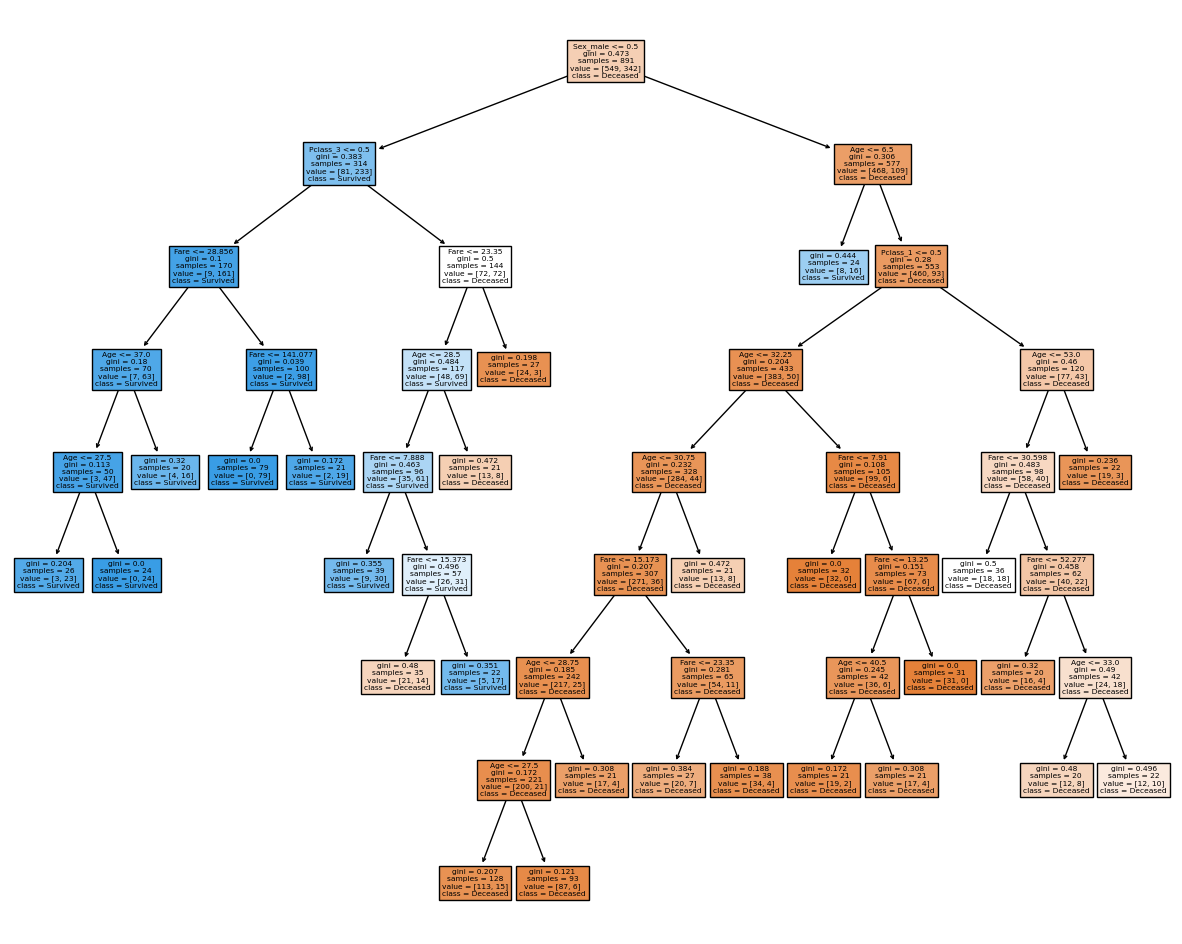

In [312]:
# Plot the tree
plt.subplots(figsize = (15,12))
plot_tree(tree, impurity=True,
          feature_names=tree.feature_names_in_,
          class_names=['Deceased', 'Survived'],
          filled=True)
plt.show()

In [313]:
print(classification_report(train_df['Survived'], predictions))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       549
           1       0.88      0.65      0.75       342

    accuracy                           0.83       891
   macro avg       0.85      0.80      0.81       891
weighted avg       0.84      0.83      0.83       891



In [314]:
confusion_matrix_df = pd.concat([
    pd.Series(train_df.Survived, name='Actual'),
    pd.Series(predictions, name='Predicted')], axis=1)
confusion_matrix_df

,Actual,Predicted
0,0,0
1,1,1
2,1,0
3,1,1
4,0,0
...,...,...
886,0,0
887,1,1
888,0,0
889,1,0


In [315]:
pd.crosstab(confusion_matrix_df['Actual'], confusion_matrix_df['Predicted'])

Predicted,0,1
Actual,,
0,518,31
1,118,224


# Test fitted decision tree on test data and submit

In [379]:
raw_test_df = pd.read_csv('./data/test.csv')

In [389]:
# TODO: Break up cabin info into which letter and which number
test_df = raw_test_df[['PassengerId', 'Pclass', 'Sex', 'Age', 'Fare']]

In [390]:
test_df.Age.isna().any() or test_df.Fare.isna().any()

True

In [391]:
test_df = test_df.fillna(value={'Age': test_df.Age.median()})
test_df = test_df.fillna(value={'Fare': test_df.Age.median()})

In [392]:
test_df.Age.isna().any() or test_df.Fare.isna().any()

False

In [393]:
from sklearn.preprocessing import OneHotEncoder

In [394]:
encoder = OneHotEncoder(sparse = False)
encoded_sex_pclass_array = encoder.fit_transform(test_df.loc[:, ['Sex', 'Pclass']])
encoded_sex_pclass_df = pd.DataFrame(encoded_sex_pclass_array, columns = encoder.get_feature_names_out())

In [395]:
test_df = pd.concat([test_df, encoded_sex_pclass_df], axis=1)
test_df = test_df.drop(columns=['Pclass', 'Sex'])

In [396]:
# Prediction
test_predictions = tree.predict(test_df.loc[:, ['Age', 'Fare', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3']])

In [401]:
test_predictions_df = pd.concat([test_df['PassengerId'], pd.Series(test_predictions, name='Survived')], axis=1)

In [404]:
test_predictions_df.to_csv('./submissions/test_submissions.csv', index=False)